<a href="https://colab.research.google.com/github/Sharzzdevise/Comprehensive-data-science-work/blob/Master/Project_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Load the dataset

In [1]:
#Import all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pandas as pd
import tensorflow as tf
from matplotlib.colors import ListedColormap
%matplotlib inline
import os
import PIL
import PIL.Image

In [2]:
!pip install PyDrive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 2. Preliminary Data Exploration and Preprocessing

In [4]:
# Loading the dataset from the drive folder
train_file_path = '/content/drive/MyDrive/UCI DRUG REVIEW DATASET/drugsComTrain_raw.csv'
test_file_path = '/content/drive/MyDrive/UCI DRUG REVIEW DATASET/drugsComTest_raw.csv'

# Load the train dataset into a pandas DataFrame
train_df = pd.read_csv(train_file_path)

# Load the test dataset into a pandas DataFrame
test_df = pd.read_csv(test_file_path)

# Display the first few rows of the train dataset
print("Train Dataset:")
print(train_df.head())

# Display the first few rows of the test dataset
print("\nTest Dataset:")
print(test_df.head())

Train Dataset:
   uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9  20-May-12   
1  "My son is halfway through his fourth week of ...       8  27-Apr-10   
2  "I used to take another oral contraceptive, wh...       5  14-Dec-09   
3  "This is my first time using any form of birth...       8   3-Nov-15   
4  "Suboxone has completely turned my life around...       9  27-Nov-16   

   usefulCount  
0           27  
1          192  
2           17  
3           10  
4           37  

Test

In [5]:
#Exploratory analysis of the dataset
# Display basic information about the train dataset
print("Train Dataset Info:")
print(train_df.info())

# Display basic information about the test dataset
print("\nTest Dataset Info:")
print(test_df.info())

# Display summary statistics for numerical columns in the train dataset
print("\nTrain Dataset Summary Statistics:")
print(train_df.describe())

# Display summary statistics for numerical columns in the test dataset
print("\nTest Dataset Summary Statistics:")
print(test_df.describe())

# Display the first few rows of the train dataset
print("\nFirst Few Rows of Train Dataset:")
print(train_df.head())

# Display the first few rows of the test dataset
print("\nFirst Few Rows of Test Dataset:")
print(test_df.head())

# Display the number of unique values in each column of the train dataset
print("\nUnique Values in Train Dataset:")
print(train_df.nunique())

# Display the number of unique values in each column of the test dataset
print("\nUnique Values in Test Dataset:")
print(test_df.nunique())

Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB
None

Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uniqueID     53766 non-null  int64 
 1   drugName     53766 non-null  object
 2   condition    53471 non-null  object
 3   review       53766 non-null  object
 4   rating       53766 non-null  int64 
 5   date         5376

In [6]:
# Check for missing values in the train dataset
missing_train = train_df.isnull().sum()

# Check for missing values in the test dataset
missing_test = test_df.isnull().sum()

print("Missing Values in Train Dataset:")
print(missing_train)

print("\nMissing Values in Test Dataset:")
print(missing_test)

Missing Values in Train Dataset:
uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

Missing Values in Test Dataset:
uniqueID         0
drugName         0
condition      295
review           0
rating           0
date             0
usefulCount      0
dtype: int64


The condition column in both the train and test data contain misssing values respectively, 899 missing values in the train dataset and 295 missing values in the test dataset, considering the nature of the project and and the importance of retaining the condition information for predicting drug effectiveness and understanding user sentiments, I will implore the strategy of Imputting a Placeholder Category Only, ("Not Specified") which allows me to keep all rows in the dataset while clearly indicating that the condition information was missing or unspecified. This approach ensures that the integrity of the condition column is maintained while simplifying the dataset structure and facilitating analysis.

In [7]:
# Impute missing values in the condition column with a placeholder category
train_df['condition'].fillna('Not Specified', inplace=True)
test_df['condition'].fillna('Not Specified', inplace=True)

In [8]:
#Deriving the distribution of Variables
numerical_vars = ['rating', 'usefulCount']
categorical_vars = ['condition', 'drugName']

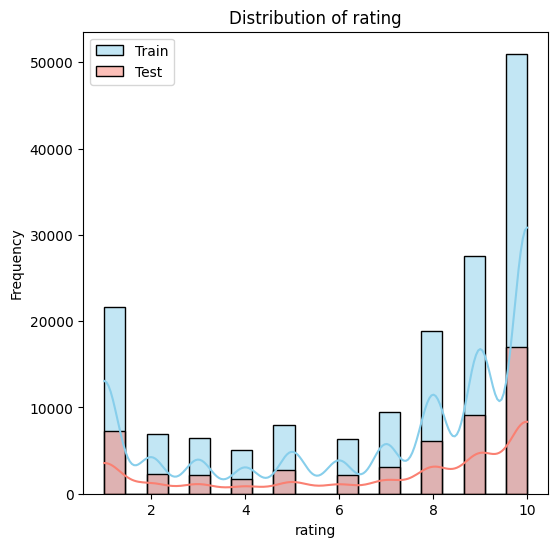

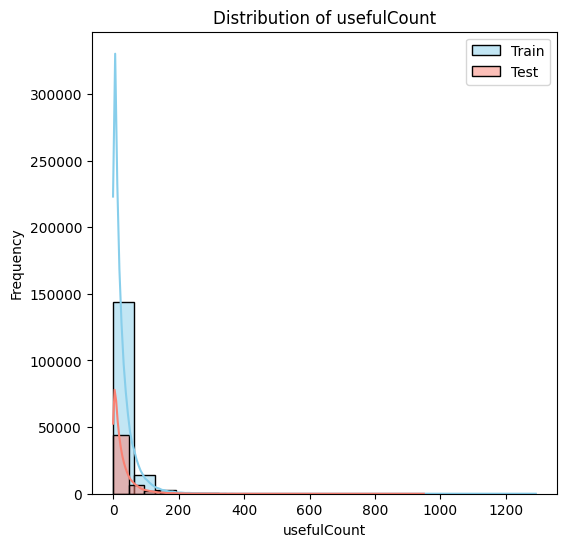

In [9]:
# Visualize numerical variables
for var in numerical_vars:
    plt.figure(figsize=(6, 6))
    sns.histplot(train_df[var], bins=20, kde=True, label='Train', color='skyblue')
    sns.histplot(test_df[var], bins=20, kde=True, label='Test', color='salmon')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

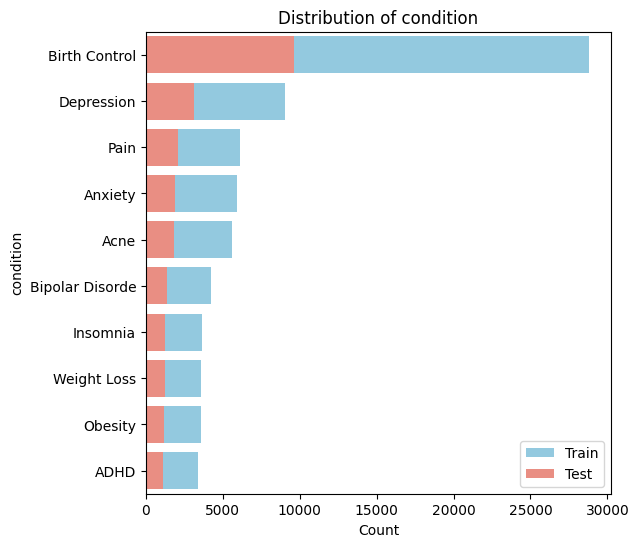

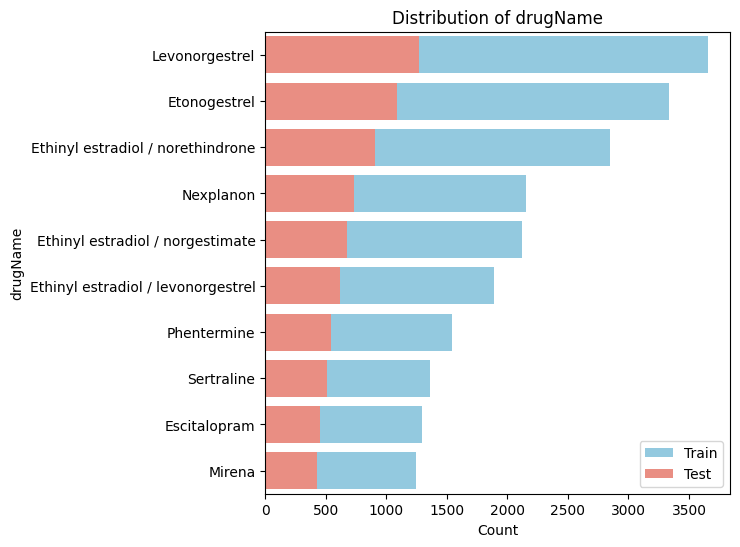

In [10]:
#Visualize categorical variables
for var in categorical_vars:
    plt.figure(figsize=(6, 6))
    sns.countplot(y=train_df[var], order=train_df[var].value_counts().index[:10], label='Train', color='skyblue')
    sns.countplot(y=test_df[var], order=test_df[var].value_counts().index[:10], label='Test', color='salmon')
    plt.title(f'Distribution of {var}')
    plt.xlabel('Count')
    plt.ylabel(var)
    plt.legend()
    plt.show()

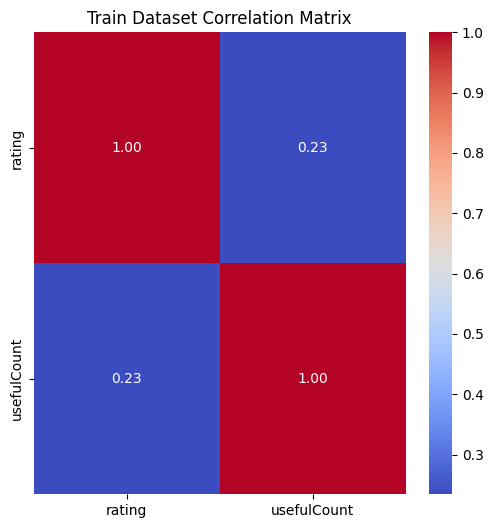

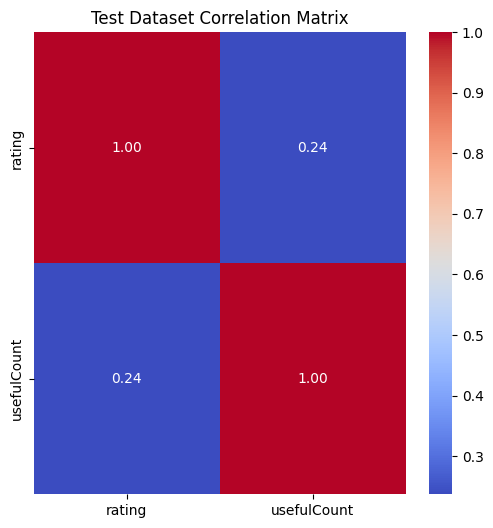

In [11]:
#Correlation Analysis
train_correlation_matrix = train_df[numerical_vars].corr()
test_correlation_matrix = test_df[numerical_vars].corr()

plt.figure(figsize=(6, 6))
sns.heatmap(train_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Train Dataset Correlation Matrix')
plt.show()

plt.figure(figsize=(6, 6))
sns.heatmap(test_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Test Dataset Correlation Matrix')
plt.show()

<ipython-input-12-cbd42e3f229f>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_df['date'] = pd.to_datetime(train_df['date'])
<ipython-input-12-cbd42e3f229f>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_df['date'] = pd.to_datetime(test_df['date'])


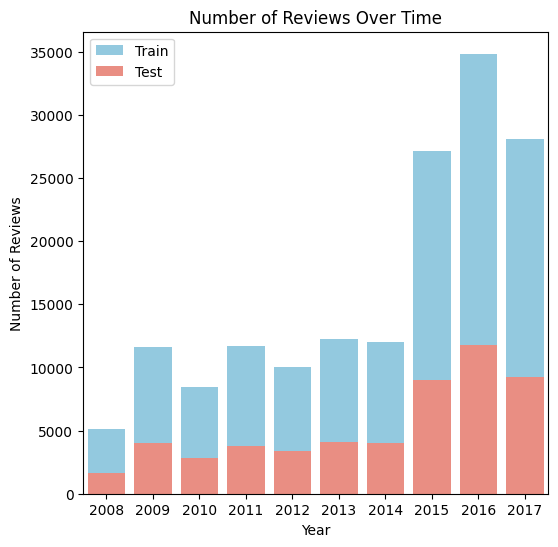

In [12]:
#Temporal Analysis
train_df['date'] = pd.to_datetime(train_df['date'])
train_df['year'] = train_df['date'].dt.year
test_df['date'] = pd.to_datetime(test_df['date'])
test_df['year'] = test_df['date'].dt.year

plt.figure(figsize=(6, 6))
sns.countplot(x=train_df['year'], label='Train', color='skyblue')
sns.countplot(x=test_df['year'], label='Test', color='salmon')
plt.title('Number of Reviews Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.legend()
plt.show()

In [13]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

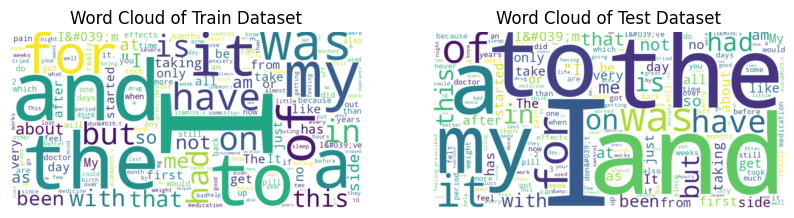

In [14]:
#Word Frequency Analysis
all_train_reviews = ' '.join(train_df['review'])
all_test_reviews = ' '.join(test_df['review'])

train_word_counts = Counter(all_train_reviews.split())
test_word_counts = Counter(all_test_reviews.split())

train_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(train_word_counts)
test_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(test_word_counts)

plt.figure(figsize=(10, 7))
plt.subplot(1, 2, 1)
plt.imshow(train_wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Train Dataset')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(test_wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Test Dataset')
plt.axis('off')

plt.show()

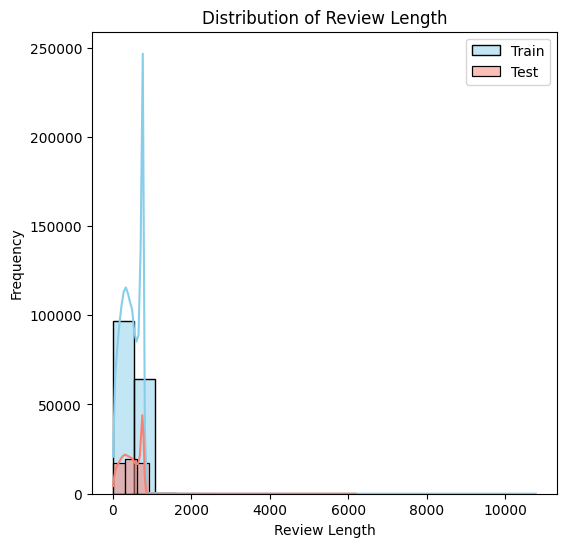

In [15]:
#Length of Reviews
train_df['review_length'] = train_df['review'].apply(len)
test_df['review_length'] = test_df['review'].apply(len)

plt.figure(figsize=(6, 6))
sns.histplot(train_df['review_length'], bins=20, kde=True, label='Train', color='skyblue')
sns.histplot(test_df['review_length'], bins=20, kde=True, label='Test', color='salmon')
plt.title('Distribution of Review Length')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [16]:
#converting all texts to lowercase to ensure consistency
train_df['review'] = train_df['review'].str.lower()
test_df['review'] = test_df['review'].str.lower()

In [17]:
#Carry out tokenization technique(split texts into individual words/tokens)
import nltk
nltk.download('punkt')

train_df['review'] = train_df['review'].apply(nltk.word_tokenize)
test_df['review'] = test_df['review'].apply(nltk.word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
#Removing common stopwords that do not necessarily contribute to the meaning of the text
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

train_df['review'] = train_df['review'].apply(lambda x: [word for word in x if word not in stop_words])
test_df['review'] = test_df['review'].apply(lambda x: [word for word in x if word not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
#Stemming/Lemmatization(Reducing words to their root form to normalize the text)
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

train_df['review'] = train_df['review'].apply(lambda x: [stemmer.stem(word) for word in x])
test_df['review'] = test_df['review'].apply(lambda x: [stemmer.stem(word) for word in x])

# Or, you can use lemmatization instead
train_df['review'] = train_df['review'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
test_df['review'] = test_df['review'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
#Converting tokenized words back to string
train_df['review'] = train_df['review'].apply(lambda x: ' '.join(x))
test_df['review'] = test_df['review'].apply(lambda x: ' '.join(x))

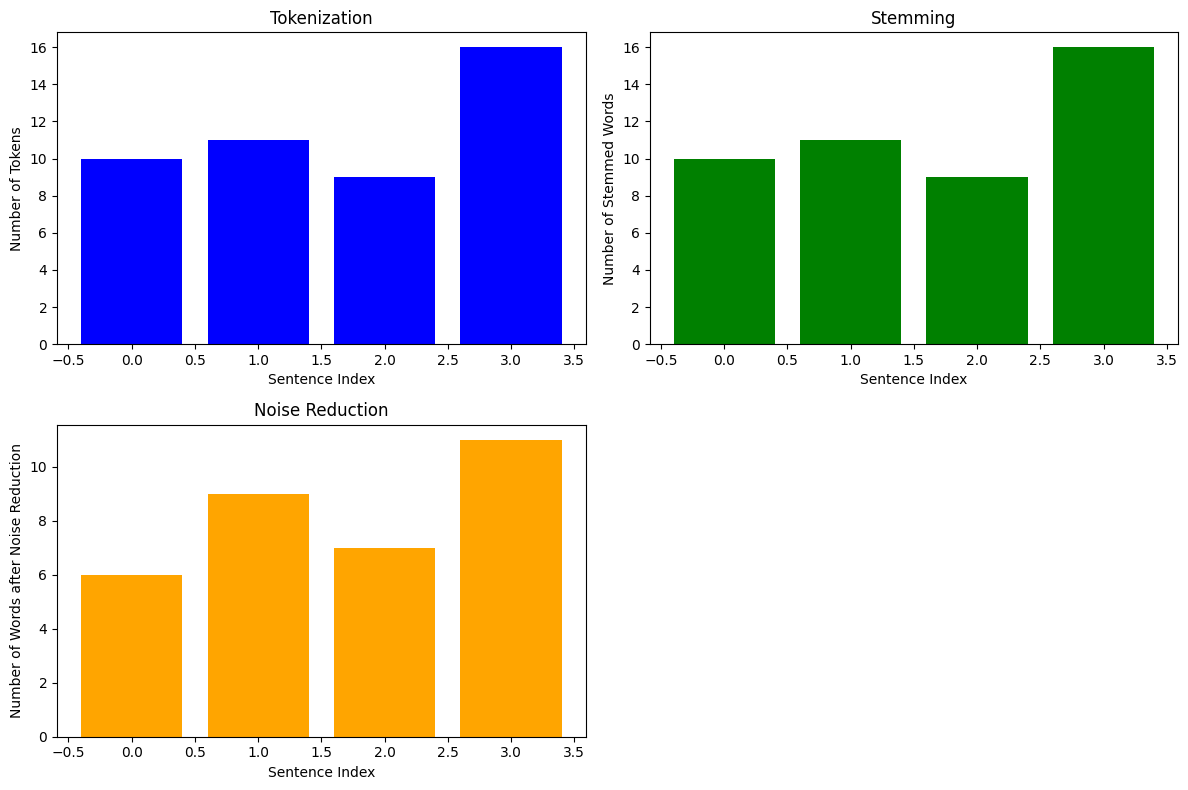

In [21]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample text data
text_data = [
    "This is a sample sentence for tokenization and stemming.",
    "Preprocessing steps like noise reduction and dimensionality reduction are important.",
    "Tokenization separates text into individual tokens or words.",
    "Stemming reduces words to their root form, such as 'running' to 'run'."
]

# Tokenization
tokenized_text = [word_tokenize(sentence.lower()) for sentence in text_data]

# Stemming
stemmer = PorterStemmer()
stemmed_text = [[stemmer.stem(word) for word in sentence] for sentence in tokenized_text]

# Noise reduction (removing stopwords)
stop_words = set(stopwords.words('english'))
filtered_text = [[word for word in sentence if word not in stop_words] for sentence in stemmed_text]

# Dimensionality reduction (TF-IDF vectorization)
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([' '.join(sentence) for sentence in filtered_text])

# Plotting the preprocessing steps
plt.figure(figsize=(12, 8))

# Tokenization
plt.subplot(2, 2, 1)
plt.bar(range(len(tokenized_text)), [len(sentence) for sentence in tokenized_text], color='blue')
plt.title('Tokenization')
plt.xlabel('Sentence Index')
plt.ylabel('Number of Tokens')

# Stemming
plt.subplot(2, 2, 2)
plt.bar(range(len(stemmed_text)), [len(sentence) for sentence in stemmed_text], color='green')
plt.title('Stemming')
plt.xlabel('Sentence Index')
plt.ylabel('Number of Stemmed Words')

# Noise reduction
plt.subplot(2, 2, 3)
plt.bar(range(len(filtered_text)), [len(sentence) for sentence in filtered_text], color='orange')
plt.title('Noise Reduction')
plt.xlabel('Sentence Index')
plt.ylabel('Number of Words after Noise Reduction')

plt.tight_layout()
plt.show()

In [22]:
#Perfroming numerical data scaling on the train and test set
from sklearn.preprocessing import MinMaxScaler

# Define the numerical columns
numerical_cols = ['rating', 'usefulCount']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns in the train set
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])

# Transform the numerical columns in the test set
test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])

3. Exploratory Data Analysis

In [23]:
#First get an overview of the Data sets after the preprocessing
# Check the size of the datasets
print("Train dataset size:", train_df.shape)
print("Test dataset size:", test_df.shape)

# Display the structure of the datasets
print("\nTrain dataset structure:")
print(train_df.info())

print("\nTest dataset structure:")
print(test_df.info())

# Display the first few rows of the datasets
print("\nFirst few rows of the train dataset:")
print(train_df.head())

print("\nFirst few rows of the test dataset:")
print(test_df.head())

# Check for missing values in both datasets
print("\nMissing values in train dataset:")
print(train_df.isnull().sum())

print("\nMissing values in test dataset:")
print(test_df.isnull().sum())

Train dataset size: (161297, 9)
Test dataset size: (53766, 9)

Train dataset structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   uniqueID       161297 non-null  int64         
 1   drugName       161297 non-null  object        
 2   condition      161297 non-null  object        
 3   review         161297 non-null  object        
 4   rating         161297 non-null  float64       
 5   date           161297 non-null  datetime64[ns]
 6   usefulCount    161297 non-null  float64       
 7   year           161297 non-null  int32         
 8   review_length  161297 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(3)
memory usage: 10.5+ MB
None

Test dataset structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 9 columns):


<ipython-input-24-cea300e0d831>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='drugName', data=train_df, order=train_df['drugName'].value_counts().iloc[:10].index, palette='viridis')


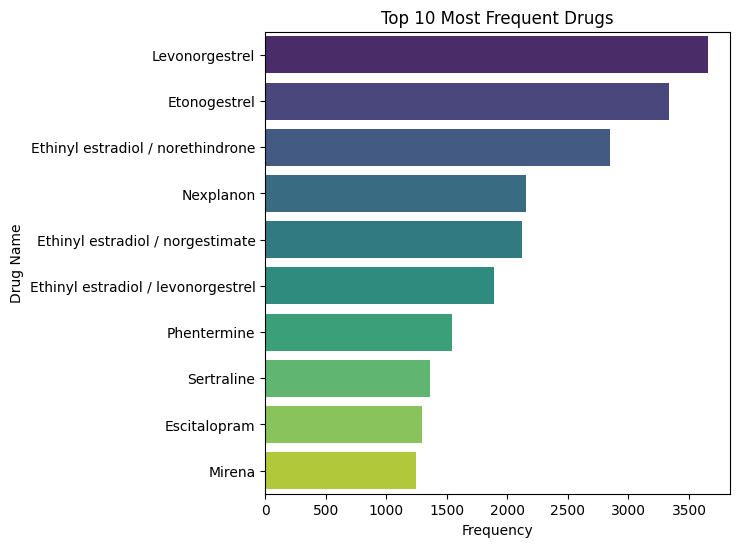

<ipython-input-24-cea300e0d831>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='condition', data=train_df, order=train_df['condition'].value_counts().iloc[:10].index, palette='magma')


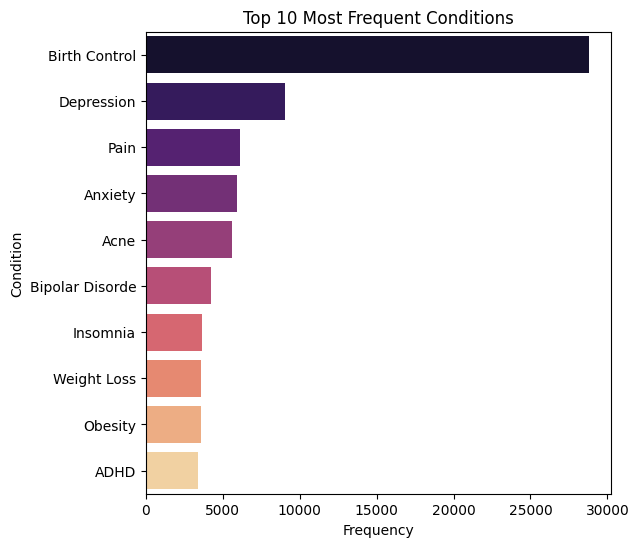

In [24]:
# Univariate Analysis for Categorical Variables (e.g., 'drugName' and 'condition')

# Count plot for 'drugName' variable (showing top 10 most frequent drugs)
plt.figure(figsize=(6, 6))
sns.countplot(y='drugName', data=train_df, order=train_df['drugName'].value_counts().iloc[:10].index, palette='viridis')
plt.title('Top 10 Most Frequent Drugs')
plt.xlabel('Frequency')
plt.ylabel('Drug Name')
plt.show()

# Count plot for 'condition' variable (showing top 10 most frequent conditions)
plt.figure(figsize=(6, 6))
sns.countplot(y='condition', data=train_df, order=train_df['condition'].value_counts().iloc[:10].index, palette='magma')
plt.title('Top 10 Most Frequent Conditions')
plt.xlabel('Frequency')
plt.ylabel('Condition')
plt.show()

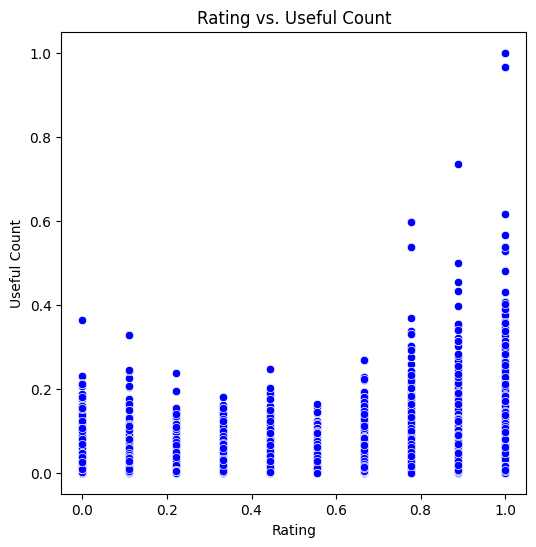

<ipython-input-25-d5b030090069>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating', y='drugName', data=train_df, order=train_df['drugName'].value_counts().iloc[:10].index, palette='viridis')


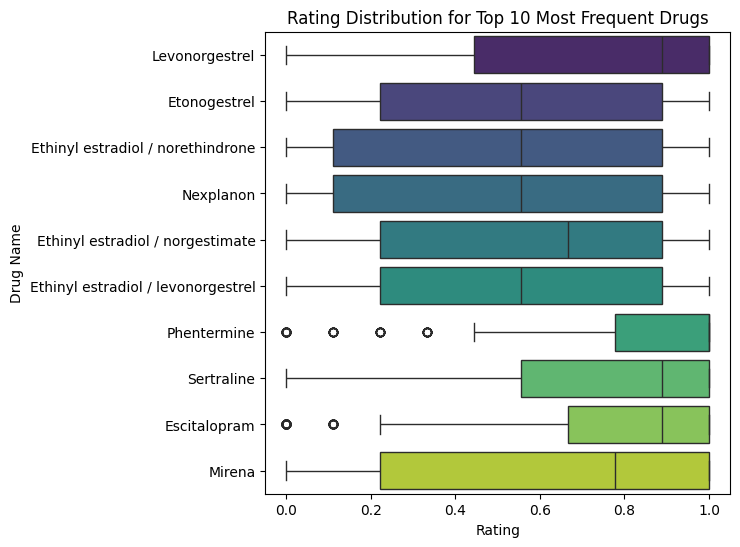

<ipython-input-25-d5b030090069>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating', y='condition', data=train_df, order=train_df['condition'].value_counts().iloc[:10].index, palette='magma')


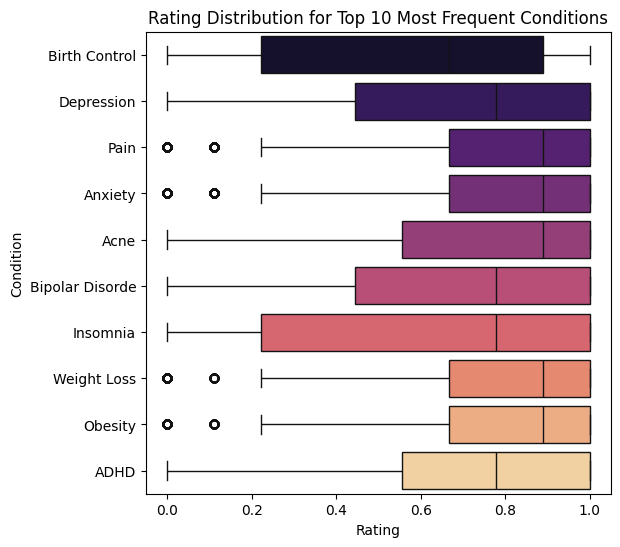

In [25]:
# Bivariate Analysis: Scatter plots for numerical variables

# Scatter plot of 'rating' vs. 'usefulCount'
plt.figure(figsize=(6, 6))
sns.scatterplot(x='rating', y='usefulCount', data=train_df, color='blue')
plt.title('Rating vs. Useful Count')
plt.xlabel('Rating')
plt.ylabel('Useful Count')
plt.show()

# Bivariate Analysis: Box plots for comparing numerical variables across categories

# Box plot of 'rating' for different 'drugName'
plt.figure(figsize=(6, 6))
sns.boxplot(x='rating', y='drugName', data=train_df, order=train_df['drugName'].value_counts().iloc[:10].index, palette='viridis')
plt.title('Rating Distribution for Top 10 Most Frequent Drugs')
plt.xlabel('Rating')
plt.ylabel('Drug Name')
plt.show()

# Box plot of 'rating' for different 'condition'
plt.figure(figsize=(6, 6))
sns.boxplot(x='rating', y='condition', data=train_df, order=train_df['condition'].value_counts().iloc[:10].index, palette='magma')
plt.title('Rating Distribution for Top 10 Most Frequent Conditions')
plt.xlabel('Rating')
plt.ylabel('Condition')
plt.show()

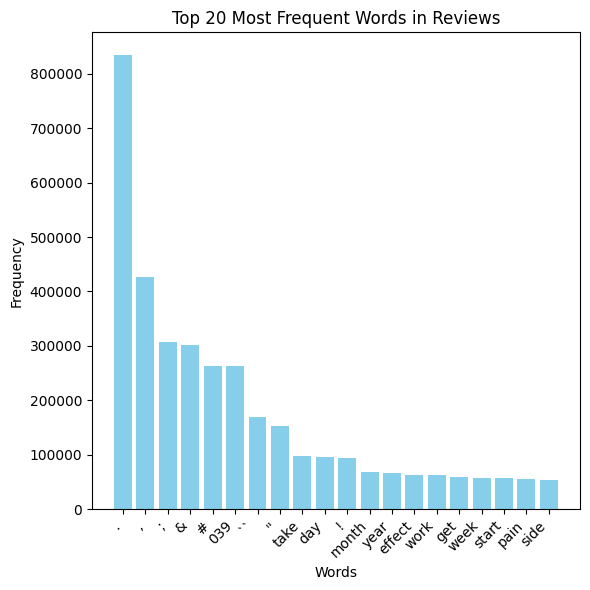

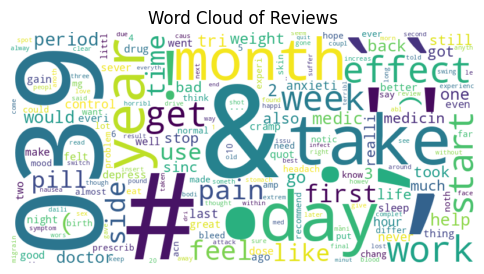

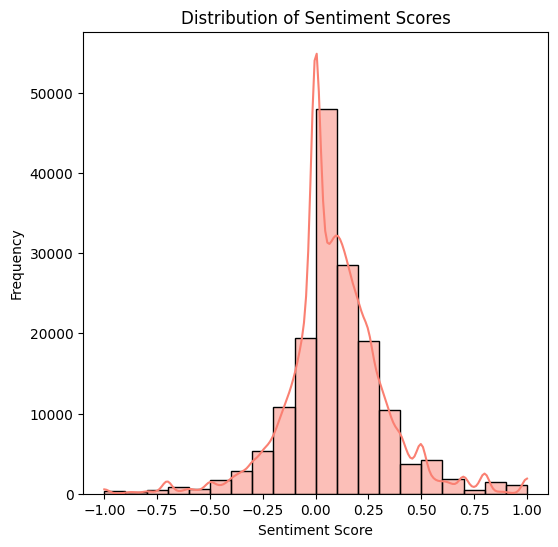

In [27]:
# Word Frequency Analysis
def word_frequency_analysis(text_data):
    # Tokenize the text
    tokens = ' '.join(text_data).split()
    # Count the frequency of each word
    word_counts = Counter(tokens)
    # Sort the words by frequency
    sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    return sorted_word_counts

# Generate word frequency analysis for reviews
word_freq_analysis = word_frequency_analysis(train_df['review'])

# Visualize Word Frequency with Bar Plot
plt.figure(figsize=(6, 6))
top_words = word_freq_analysis[:20]  # Show top 20 words
plt.bar([word[0] for word in top_words], [word[1] for word in top_words], color='skyblue')
plt.title('Top 20 Most Frequent Words in Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(word_freq_analysis))
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Reviews')
plt.axis('off')
plt.show()

#Using TextBlob
from textblob import TextBlob

def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Add sentiment analysis results to DataFrame
train_df['sentiment'] = train_df['review'].apply(analyze_sentiment)

# Visualize sentiment distribution
plt.figure(figsize=(6, 6))
sns.histplot(train_df['sentiment'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

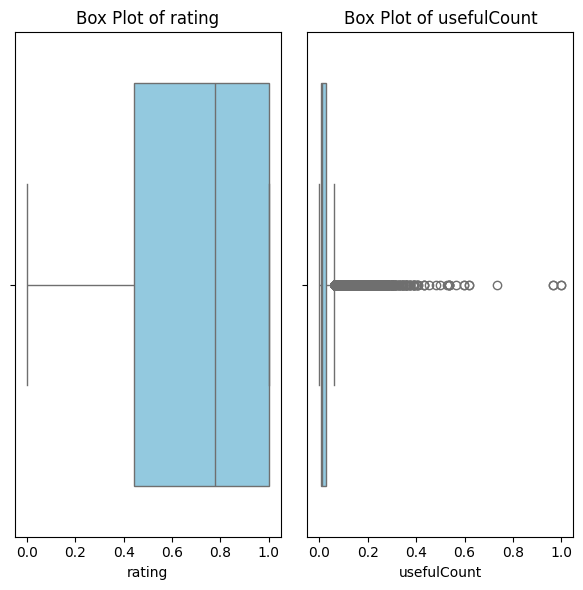

In [28]:
# Numerical variables for outlier detection (e.g., 'rating' and 'usefulCount')
numerical_vars = ['rating', 'usefulCount']

# Create box plots for each numerical variable
plt.figure(figsize=(6, 6))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(1, len(numerical_vars), i)
    sns.boxplot(x=train_df[var], color='skyblue')
    plt.title(f'Box Plot of {var}')
    plt.xlabel(var)
plt.tight_layout()
plt.show()

4. Feature Engineering and Sentiment score derivation and analysis.


In [29]:
#Identifying relevant features in the set, Check the columns in the dataset
print(train_df.columns)

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'year', 'review_length', 'sentiment'],
      dtype='object')


In [30]:
#Create new features; Calculate review length
train_df['review_length'] = train_df['review'].apply(len)
test_df['review_length'] = test_df['review'].apply(len)

In [31]:
# Check for missing values
print(train_df.isnull().sum())

uniqueID         0
drugName         0
condition        0
review           0
rating           0
date             0
usefulCount      0
year             0
review_length    0
sentiment        0
dtype: int64


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform on train_df
tfidf_train = tfidf_vectorizer.fit_transform(train_df['review'])

# Transform test_df using the fitted vectorizer
tfidf_test = tfidf_vectorizer.transform(test_df['review'])

In [33]:
# Calculate review length in terms of number of words
train_df['review_length'] = train_df['review'].apply(lambda x: len(x.split()))

test_df['review_length'] = test_df['review'].apply(lambda x: len(x.split()))

In [34]:
# Lexicon-based features (example: frequency of positive/negative words)
positive_words = ['good', 'great', 'excellent', 'effective']
negative_words = ['bad', 'poor', 'ineffective']

# Calculate frequency of positive and negative words
def calculate_word_frequency(text, word_list):
    return sum(1 for word in text.lower().split() if word in word_list)

# Calculate positive and negative word frequencies in train_df
train_df['positive_word_freq'] = train_df['review'].apply(lambda x: calculate_word_frequency(x, positive_words))
train_df['negative_word_freq'] = train_df['review'].apply(lambda x: calculate_word_frequency(x, negative_words))

# Repeat for test_df
test_df['positive_word_freq'] = test_df['review'].apply(lambda x: calculate_word_frequency(x, positive_words))
test_df['negative_word_freq'] = test_df['review'].apply(lambda x: calculate_word_frequency(x, negative_words))

In [36]:
from textblob import TextBlob

# Function to calculate sentiment polarity score using TextBlob
def calculate_polarity(text):
    return TextBlob(text).sentiment.polarity

# Function to calculate subjectivity score using TextBlob
def calculate_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Calculate sentiment polarity score in train_df
train_df['sentiment_polarity'] = train_df['review'].apply(calculate_polarity)

# Calculate sentiment subjectivity score in train_df
train_df['sentiment_subjectivity'] = train_df['review'].apply(calculate_subjectivity)

# Do the same for test_df
test_df['sentiment_polarity'] = test_df['review'].apply(calculate_polarity)
test_df['sentiment_subjectivity'] = test_df['review'].apply(calculate_subjectivity)

In [37]:
# Print the first few rows of train_df to inspect the added columns
print(train_df[['review', 'sentiment_polarity', 'sentiment_subjectivity']].head())

# Print the first few rows of test_df to inspect the added columns
print(test_df[['review', 'sentiment_polarity', 'sentiment_subjectivity']].head())

                                              review  sentiment_polarity  \
0  `` side effect , take combin bystol 5 mg fish ...            0.000000   
1  `` son halfway fourth week intuniv . becam con...            0.237500   
2  `` use take anoth oral contracept , 21 pill cy...            0.120833   
3  `` first time use form birth control . & # 039...            0.300000   
4  `` suboxon complet turn life around . feel hea...            0.147037   

   sentiment_subjectivity  
0                0.000000  
1                0.404167  
2                0.330556  
3                0.450000  
4                0.288519  
                                              review  sentiment_polarity  \
0  `` & # 039 ; tri antidepress year ( citalopram...           -0.122222   
1  `` son crohn & # 039 ; diseas done well asacol...           -0.300000   
2                         `` quick reduct symptom ''            0.333333   
3  `` contrav combin drug use alcohol , smoke , o...            0.70000

In [38]:
# Display train_df with added sentiment scores
print(train_df)

# Display test_df with added sentiment scores
print(test_df)

        uniqueID                  drugName                     condition  \
0         206461                 Valsartan  Left Ventricular Dysfunction   
1          95260                Guanfacine                          ADHD   
2          92703                    Lybrel                 Birth Control   
3         138000                Ortho Evra                 Birth Control   
4          35696  Buprenorphine / naloxone             Opiate Dependence   
...          ...                       ...                           ...   
161292    191035                   Campral            Alcohol Dependence   
161293    127085            Metoclopramide               Nausea/Vomiting   
161294    187382                   Orencia          Rheumatoid Arthritis   
161295     47128        Thyroid desiccated           Underactive Thyroid   
161296    215220              Lubiprostone         Constipation, Chronic   

                                                   review    rating  \
0       `` side 

In [39]:
# Create a DataFrame with sentiment scores
sentiment_scores = pd.DataFrame({
    'Review': train_df['review'],
    'Sentiment Polarity': train_df['sentiment_polarity'],
    'Sentiment Subjectivity': train_df['sentiment_subjectivity']
})

# Display the DataFrame
print(sentiment_scores)

                                                   Review  Sentiment Polarity  \
0       `` side effect , take combin bystol 5 mg fish ...            0.000000   
1       `` son halfway fourth week intuniv . becam con...            0.237500   
2       `` use take anoth oral contracept , 21 pill cy...            0.120833   
3       `` first time use form birth control . & # 039...            0.300000   
4       `` suboxon complet turn life around . feel hea...            0.147037   
...                                                   ...                 ...   
161292  `` wrote first report mid-octob 2014. alcohol ...            0.346667   
161293  `` given iv surgey . immedi becam anxiou could...           -0.350000   
161294  `` limit improv 4 month , develop bad rash md ...           -0.700000   
161295  `` & # 039 ; thyroid medic 49 year , spent fir...            0.198636   
161296  `` & # 039 ; chronic constip adult life . tri ...            0.100000   

        Sentiment Subjectiv

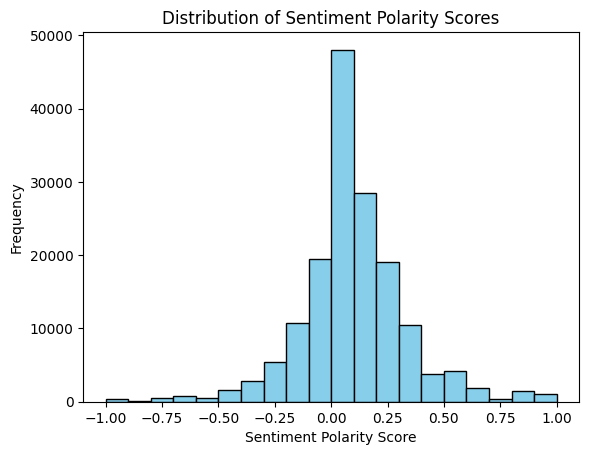

In [40]:
# Plot histogram of sentiment polarity scores
plt.hist(train_df['sentiment_polarity'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment Polarity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Polarity Scores')
plt.show()

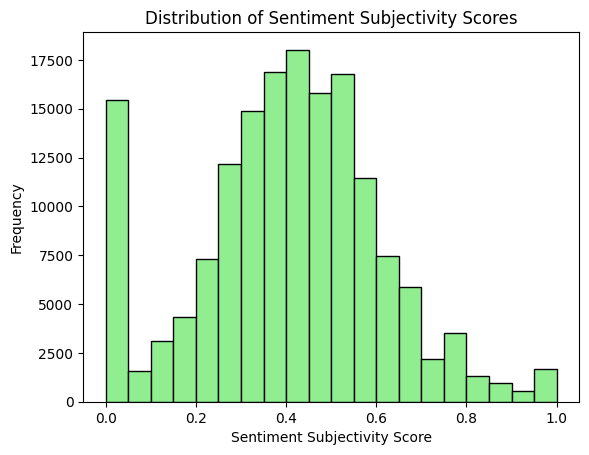

In [41]:
# Plot histogram of sentiment subjectivity scores
plt.hist(train_df['sentiment_subjectivity'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Sentiment Subjectivity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Subjectivity Scores')
plt.show()

Evaluation of Sentiment analysis features used

In [42]:
correlation_cols = ['sentiment_polarity', 'sentiment_subjectivity', 'rating']

# Calculate correlation matrix
correlation_matrix = train_df[correlation_cols].corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Extract correlation coefficients for sentiment scores with other variables
sentiment_correlation = correlation_matrix[['sentiment_polarity', 'sentiment_subjectivity']]

# Display correlation coefficients
print("\nCorrelation Coefficients:")
print(sentiment_correlation)

Correlation Matrix:
                        sentiment_polarity  sentiment_subjectivity    rating
sentiment_polarity                1.000000                0.108837  0.232134
sentiment_subjectivity            0.108837                1.000000  0.055627
rating                            0.232134                0.055627  1.000000

Correlation Coefficients:
                        sentiment_polarity  sentiment_subjectivity
sentiment_polarity                1.000000                0.108837
sentiment_subjectivity            0.108837                1.000000
rating                            0.232134                0.055627


In [43]:
# Check the column names in train_df
print(train_df.columns)

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'year', 'review_length', 'sentiment',
       'positive_word_freq', 'negative_word_freq', 'sentiment_polarity',
       'sentiment_subjectivity'],
      dtype='object')


In [44]:
# Sample a subset of reviews for qualitative analysis
sample_reviews = train_df.sample(n=10)

# Iterate over sample reviews and compare sentiment scores with actual sentiment
for index, row in sample_reviews.iterrows():
    print("Review:", row['review'])
    print("Sentiment Polarity Score:", row['sentiment_polarity'])
    print("Sentiment Subjectivity Score:", row['sentiment_subjectivity'])
    print("-" * 50)

Review: `` tri effexor xr ssri recent tri gave diarrhea initi adjust period . tend anxiou side life ssri seem treat better effexor , cant bathroom day . 75mg/day work well current . 150mg year work well , suddenli anxieti ob think come back.th doc up dose 225 got way wors , lower boom . way better . & quot ; le & quot ; work time . effexor xr also le side effect regard fatigu , hunger , weight gain sexual side effect . woman huge perk . mental health- struggl real ! good luck ! ''
Sentiment Polarity Score: 0.35
Sentiment Subjectivity Score: 0.5604166666666667
--------------------------------------------------
Review: `` & # 039 ; take methadon disk 5 yr long battl pain lead illicit use inject . save life , famili health . absolut zero crave desir return previou lifestyl . ''
Sentiment Polarity Score: -0.05
Sentiment Subjectivity Score: 0.4
--------------------------------------------------
Review: `` & # 039 ; cymbalta sever depress six month . tri depress medic either made depress wor

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_df['rating'], y_pred)

# Calculate Root Mean Squared Error (RMSE)
mse = mean_squared_error(test_df['rating'], y_pred)
rmse = np.sqrt(mse)

# Calculate R-squared (Coefficient of Determination)
r_squared = r2_score(test_df['rating'], y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (Coefficient of Determination):", r_squared)

Mean Absolute Error (MAE): 0.3034348674826467
Root Mean Squared Error (RMSE): 0.3549063753277672
R-squared (Coefficient of Determination): 0.05464432103084893


6. Predicting drug effectiveness using Random Forest Regressor.

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Selecting important features
important_features = ['sentiment_polarity', 'sentiment_subjectivity', 'usefulCount', 'rating']

# Prepare Data
X_train = train_df[important_features]
y_train = train_df['sentiment_polarity']

X_test = test_df[important_features]
y_test = test_df['sentiment_polarity']  # Using sentiment polarity as the target variable

# Train Model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Model Evaluation
y_pred_train = rf_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print("Train MSE:", mse_train)

# Prediction
y_pred_test = rf_model.predict(X_test)

Train MSE: 6.716355723158996e-10


In [52]:
#Evaluate on test data
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on testing data
y_pred_test = rf_model.predict(X_test)

# Calculate mean squared error (MSE)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Test MSE:", mse_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred_test)
print("R-squared:", r2)

Test MSE: 3.405373714026484e-09
R-squared: 0.9999999413405286


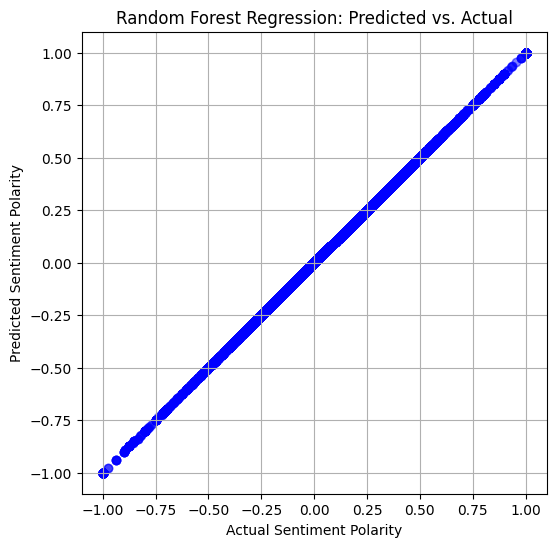

In [53]:
from sklearn.metrics import mean_squared_error, r2_score

# Scatter plot of predicted vs. actual values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)
plt.title('Random Forest Regression: Predicted vs. Actual')
plt.xlabel('Actual Sentiment Polarity')
plt.ylabel('Predicted Sentiment Polarity')
plt.grid(True)
plt.show()

6. Predicting drug effectiveness using Linear Regression Technique and comparing both techniques to see which yielded higher results.

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on testing data
y_pred_test_lr = lr_model.predict(X_test)

# Evaluate Linear Regression Model
mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)
r2_lr = r2_score(y_test, y_pred_test_lr)

# Compare Performance
print("Linear Regression Model:")
print("Test MSE:", mse_test_lr)
print("R-squared:", r2_lr)

# Random Forest Regression Model
print("\nRandom Forest Regression Model:")
print("Test MSE:", mse_test)
print("R-squared:", r2)

Linear Regression Model:
Test MSE: 3.6363515597568447e-32
R-squared: 1.0

Random Forest Regression Model:
Test MSE: 3.405373714026484e-09
R-squared: 0.9999999413405286


Mean Absolute Error: 1.546295930264219e-16
Root Mean Squared Error: 1.9069220119755408e-16
Adjusted R-squared: 1.0


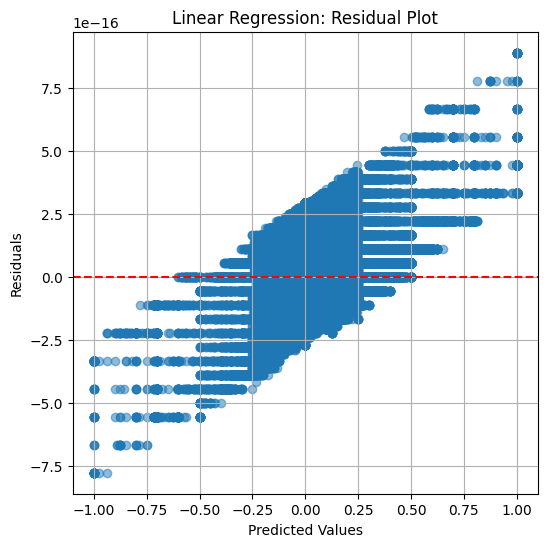


Feature Importance (Coefficients):
sentiment_polarity        1.000000e+00
sentiment_subjectivity    1.000839e-16
usefulCount               2.852853e-18
rating                    4.601771e-16
dtype: float64

Cross-validation MSE scores:
[-2.32225984e-32 -1.28647964e-32 -3.77717038e-33 -4.73412790e-32
 -3.97650680e-33]


In [55]:
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm

# Evaluate Linear Regression Model
mae_lr = mean_absolute_error(y_test, y_pred_test_lr)

# Mean Absolute Error (MAE)
print("Mean Absolute Error:", mae_lr)

# Root Mean Squared Error (RMSE)
rmse_lr = np.sqrt(mse_test_lr)
print("Root Mean Squared Error:", rmse_lr)

# Adjusted R-squared
X_test_sm = sm.add_constant(X_test)  # Add constant term for statsmodels
lr_model_sm = sm.OLS(y_test, X_test_sm).fit()
adj_r2_lr = lr_model_sm.rsquared_adj
print("Adjusted R-squared:", adj_r2_lr)

# Residual Analysis
residuals_lr = y_test - y_pred_test_lr
plt.figure(figsize=(6, 6))
plt.scatter(y_pred_test_lr, residuals_lr, alpha=0.5)
plt.title('Linear Regression: Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

# Feature Importance (Coefficients)
feature_importance_lr = pd.Series(lr_model.coef_, index=X_train.columns)
print("\nFeature Importance (Coefficients):")
print(feature_importance_lr)

# Cross-validation (optional)
from sklearn.model_selection import cross_val_score
cv_scores_lr = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("\nCross-validation MSE scores:")
print(cv_scores_lr)

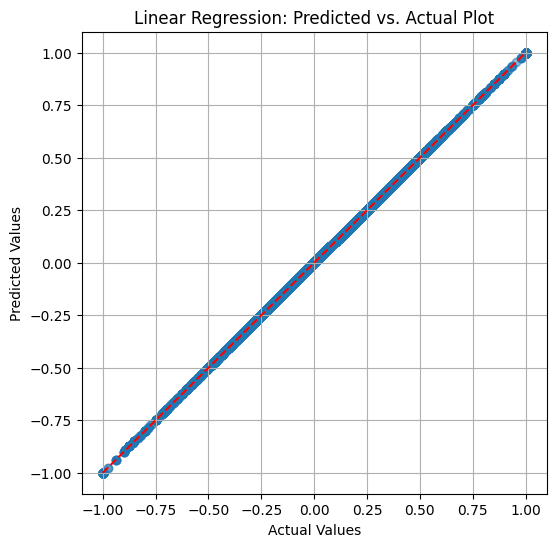

In [56]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_test_lr, alpha=0.5)
plt.title('Linear Regression: Predicted vs. Actual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.grid(True)
plt.show()

7. Performing Sentiment analysis using Naive Bayes classifier.

In [59]:
# Define thresholds for sentiment classification
positive_threshold = 0.2
negative_threshold = -0.2

# Function to classify sentiment based on polarity score
def classify_sentiment(score):
    if score > positive_threshold:
        return 'positive'
    elif score < negative_threshold:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment classification to the 'sentiment_polarity' column in train_df
train_df['sentiment_label'] = train_df['sentiment_polarity'].apply(classify_sentiment)

# Apply sentiment classification to the 'sentiment_polarity' column in test_df
test_df['sentiment_label'] = test_df['sentiment_polarity'].apply(classify_sentiment)

# Display the first few rows of the updated dataframes
print("Train Data:")
print(train_df.head())
print("\nTest Data:")
print(test_df.head())

Train Data:
   uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review    rating       date  \
0  `` side effect , take combin bystol 5 mg fish ...  0.888889 2012-05-20   
1  `` son halfway fourth week intuniv . becam con...  0.777778 2010-04-27   
2  `` use take anoth oral contracept , 21 pill cy...  0.444444 2009-12-14   
3  `` first time use form birth control . & # 039...  0.777778 2015-11-03   
4  `` suboxon complet turn life around . feel hea...  0.888889 2016-11-27   

   usefulCount  year  review_length  sentiment  positive_word_freq  \
0     0.020914  2012        

In [60]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

# Define your features and target variable
X_train_text = train_df['review']
X_test_text = test_df['review']
y_train = train_df['sentiment_label']
y_test = test_df['sentiment_label']

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train_text)

# Transform the test data
X_test_tfidf = vectorizer.transform(X_test_text)

# Initialize the Naive Bayes classifier
naive_bayes = MultinomialNB()

# Train the classifier
naive_bayes.fit(X_train_tfidf, y_train)

# Evaluate the model
accuracy = naive_bayes.score(X_test_tfidf, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6763754045307443


In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict sentiment labels for the test set
y_pred = naive_bayes.predict(X_test_tfidf)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.6763754045307443
Precision: 0.7566485708298407
Recall: 0.6763754045307443
F1-score: 0.5576901968342495
Confusion Matrix:
[[    4  3904     1]
 [    1 35716    28]
 [    0 13466   646]]


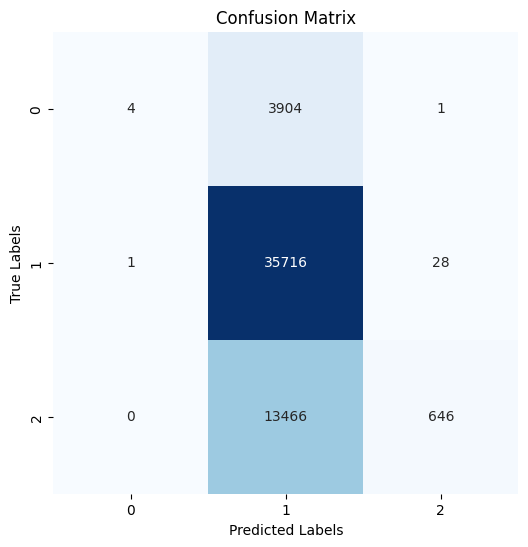

In [64]:
# Plot the heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

8. Performing Sentiment analysis using Logistics Regression Classifier

Accuracy: 0.9925975523565078
Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.96      0.98      3909
     neutral       0.99      1.00      0.99     35745
    positive       1.00      0.98      0.99     14112

    accuracy                           0.99     53766
   macro avg       1.00      0.98      0.99     53766
weighted avg       0.99      0.99      0.99     53766



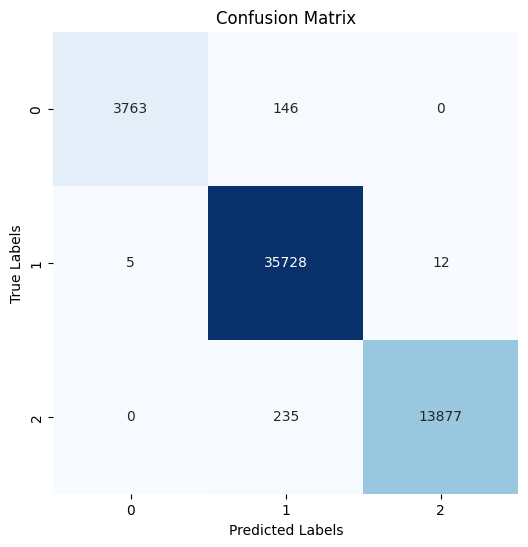

In [66]:
# Define your features and target variable
X_train = train_df[['sentiment_polarity', 'sentiment_subjectivity']]
X_test = test_df[['sentiment_polarity', 'sentiment_subjectivity']]
y_train = train_df['sentiment_label']
y_test = test_df['sentiment_label']

# Initialize the Logistic Regression classifier
logistic_regression = LogisticRegression()

# Train the classifier
logistic_regression.fit(X_train, y_train)

# Predict sentiment labels for the test set
y_pred = logistic_regression.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predict sentiment labels for the test set
y_pred = logistic_regression.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.9925975523565078
Precision: 0.9926619226307337
Recall: 0.9925975523565078
F1-score: 0.992572217965198
Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.96      0.98      3909
     neutral       0.99      1.00      0.99     35745
    positive       1.00      0.98      0.99     14112

    accuracy                           0.99     53766
   macro avg       1.00      0.98      0.99     53766
weighted avg       0.99      0.99      0.99     53766



<ipython-input-76-9c2965cf2ecc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')


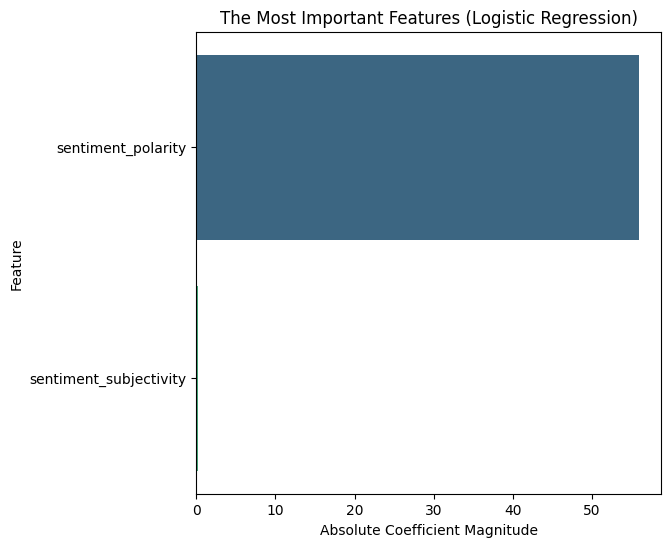

In [76]:
import seaborn as sns

# Create a DataFrame for visualization
feature_df = pd.DataFrame({'Feature': sorted_feature_names[:top_n], 'Importance': sorted_feature_importance[:top_n]})

# Plotting
plt.figure(figsize=(6, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.xlabel('Absolute Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('The Most Important Features (Logistic Regression)')
plt.show()